# Random Forest

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/Naiwen1997/IDNE-577-Machine-Learning/blob/master/Supervised%20Learning/Nonparametric%20Modeling/Lecture%203%20Ensemble%20Method%20(Random%20Forest)/Random_Forest.ipynb)

In [3]:
# !pip install ucimlrepo
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from ucimlrepo import fetch_ucirepo 
  
# fetch dataset 
wine = fetch_ucirepo(id=109) 
  
# data (as pandas dataframes) 
X = wine.data.features 
y = wine.data.targets 

In [4]:
df=pd.concat((X,y),axis=1)
df

,Alcohol,Malicacid,Ash,Alcalinity_of_ash,Magnesium,Total_phenols,Flavanoids,Nonflavanoid_phenols,Proanthocyanins,Color_intensity,Hue,0D280_0D315_of_diluted_wines,Proline,class
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.70,0.64,1.74,740,3
174,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.30,0.70,1.56,750,3
175,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.20,0.59,1.56,835,3
176,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.30,0.60,1.62,840,3


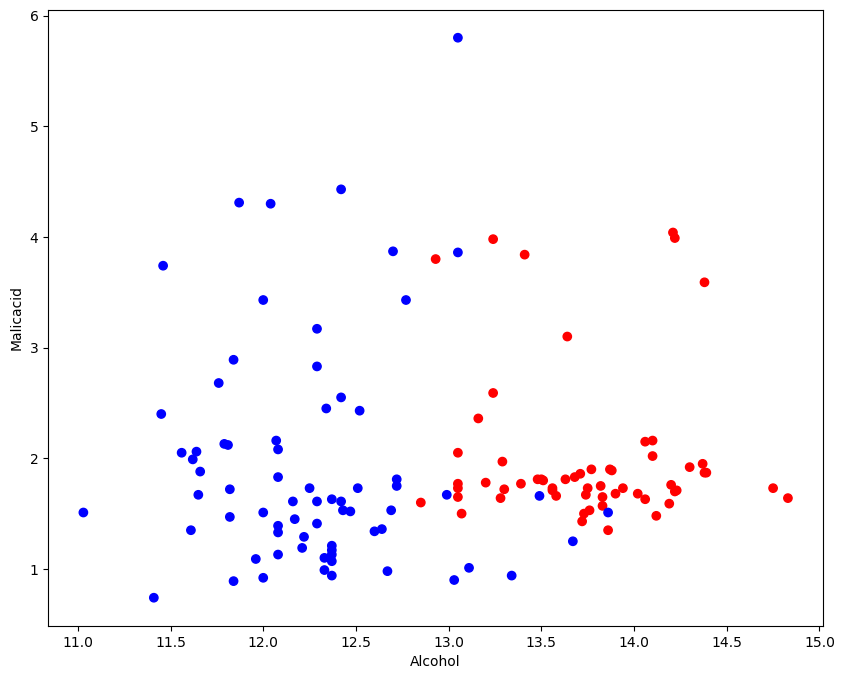

In [5]:
filter=(df['class']==3)
df=df.loc[~filter]
color=['red' if label==1 else 'blue' for label in df['class']]

plt.figure(figsize=(10,8))
plt.scatter(df.iloc[:,0],df.iloc[:,1],c=color)
plt.xlabel('Alcohol')
plt.ylabel('Malicacid')
plt.show()

In [6]:
X=df.iloc[:,:2].to_numpy()
y=df.iloc[:,-1].to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

## Bagging

In [7]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import classification_report

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

Bagging Classification Report
              precision    recall  f1-score   support

           1       0.93      1.00      0.96        27
           2       1.00      0.92      0.96        25

    accuracy                           0.96        52
   macro avg       0.97      0.96      0.96        52
weighted avg       0.96      0.96      0.96        52
 



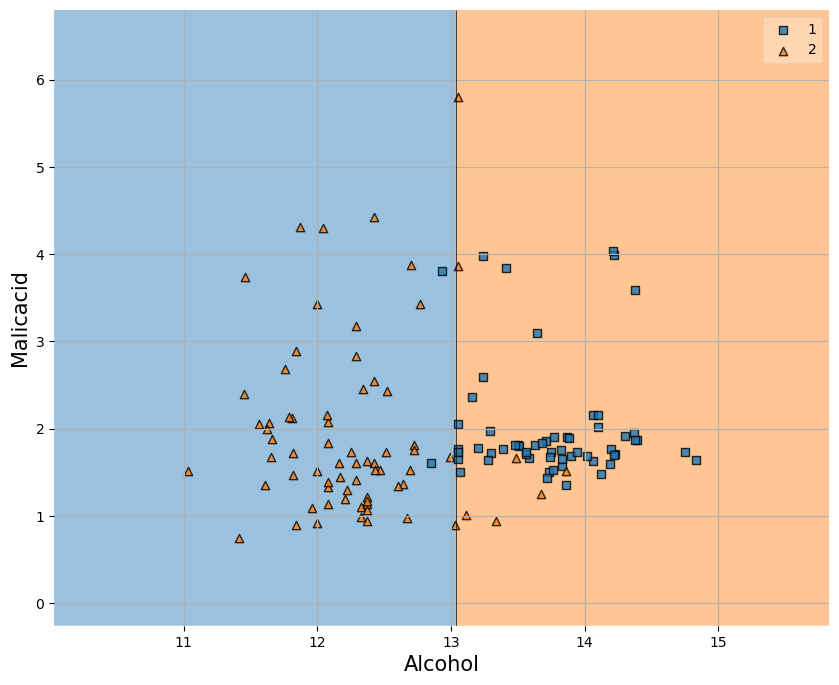

In [8]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = bag_clf)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Malicacid", fontsize = 15)
plt.grid()
plt.show()

## Random Forest

In [9]:
from sklearn.ensemble import RandomForestClassifier

forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

Forest Classification Report
              precision    recall  f1-score   support

           1       1.00      0.96      0.98        27
           2       0.96      1.00      0.98        25

    accuracy                           0.98        52
   macro avg       0.98      0.98      0.98        52
weighted avg       0.98      0.98      0.98        52
 



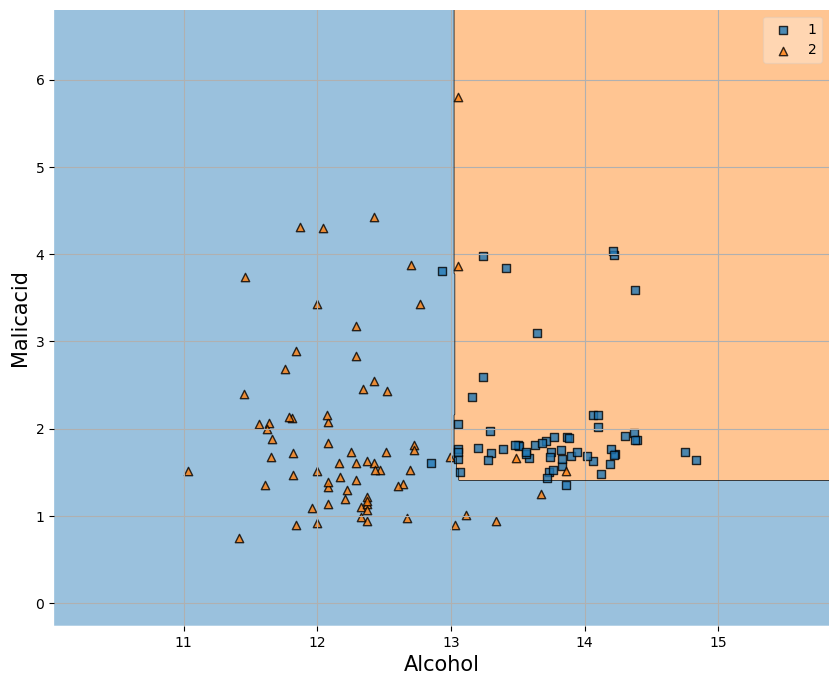

In [10]:
from mlxtend.plotting import plot_decision_regions

plt.figure(figsize = (10, 8))
plot_decision_regions(X, y, clf = forest_clf)
plt.xlabel("Alcohol", fontsize = 15)
plt.ylabel("Malicacid", fontsize = 15)
plt.grid()
plt.show()

## Using the whole features

In [11]:
X = wine.data.features.to_numpy() 
y = wine.data.targets.to_numpy()
X_train, X_test, y_train, y_test = train_test_split(X, 
                                                    y,
                                                    test_size = 0.4, 
                                                    random_state = 42)

In [12]:

bag_clf = BaggingClassifier(DecisionTreeClassifier(max_depth=1, random_state=42),
                            n_estimators = 500,
                            bootstrap = True,
                            n_jobs = -1)
bag_clf.fit(X_train, y_train)
bag_y_pred = bag_clf.predict(X_test)
print(f"Bagging Classification Report")
print(classification_report(y_test, bag_y_pred), "\n")

c:\Users\pangnaiwen\Anaconda3\Lib\site-packages\sklearn\ensemble\_bagging.py:802: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


Bagging Classification Report
              precision    recall  f1-score   support

           1       0.79      0.85      0.81        26
           2       0.85      0.81      0.83        27
           3       1.00      0.95      0.97        19

    accuracy                           0.86        72
   macro avg       0.88      0.87      0.87        72
weighted avg       0.86      0.86      0.86        72
 



In [13]:
forest_clf = RandomForestClassifier(max_depth = 1, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

C:\Users\pangnaiwen\AppData\Local\Temp\ipykernel_25416\4109701098.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train, y_train)


Forest Classification Report
              precision    recall  f1-score   support

           1       0.96      0.96      0.96        26
           2       0.96      0.96      0.96        27
           3       1.00      1.00      1.00        19

    accuracy                           0.97        72
   macro avg       0.97      0.97      0.97        72
weighted avg       0.97      0.97      0.97        72
 



In [14]:
forest_clf = RandomForestClassifier(max_depth = 3, n_estimators = 500,
                                    bootstrap = True,
                                    n_jobs = -1, random_state=2)
forest_clf.fit(X_train, y_train)
forest_y_pred = forest_clf.predict(X_test)
print(f"Forest Classification Report")
print(classification_report(y_test, forest_y_pred), "\n")

C:\Users\pangnaiwen\AppData\Local\Temp\ipykernel_25416\244229164.py:4: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  forest_clf.fit(X_train, y_train)


Forest Classification Report
              precision    recall  f1-score   support

           1       1.00      1.00      1.00        26
           2       1.00      1.00      1.00        27
           3       1.00      1.00      1.00        19

    accuracy                           1.00        72
   macro avg       1.00      1.00      1.00        72
weighted avg       1.00      1.00      1.00        72
 



## Feature Importance

In [15]:
names=wine.variables['name']
names.values

array(['class', 'Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline'], dtype=object)

In [16]:
names = ['Alcohol', 'Malicacid', 'Ash', 'Alcalinity_of_ash',
       'Magnesium', 'Total_phenols', 'Flavanoids', 'Nonflavanoid_phenols',
       'Proanthocyanins', 'Color_intensity', 'Hue',
       '0D280_0D315_of_diluted_wines', 'Proline']
for name, score in zip(names, forest_clf.feature_importances_):
    print(name, score)

Alcohol 0.12001709700664336
Malicacid 0.021775532541491952
Ash 0.010821404924910778
Alcalinity_of_ash 0.045803924201771734
Magnesium 0.03202794934990893
Total_phenols 0.06175483666025138
Flavanoids 0.15268653519125872
Nonflavanoid_phenols 0.0073878467445844045
Proanthocyanins 0.028951065389498664
Color_intensity 0.17446703158077573
Hue 0.06117720874942088
0D280_0D315_of_diluted_wines 0.13442471323019822
Proline 0.1487048544292852


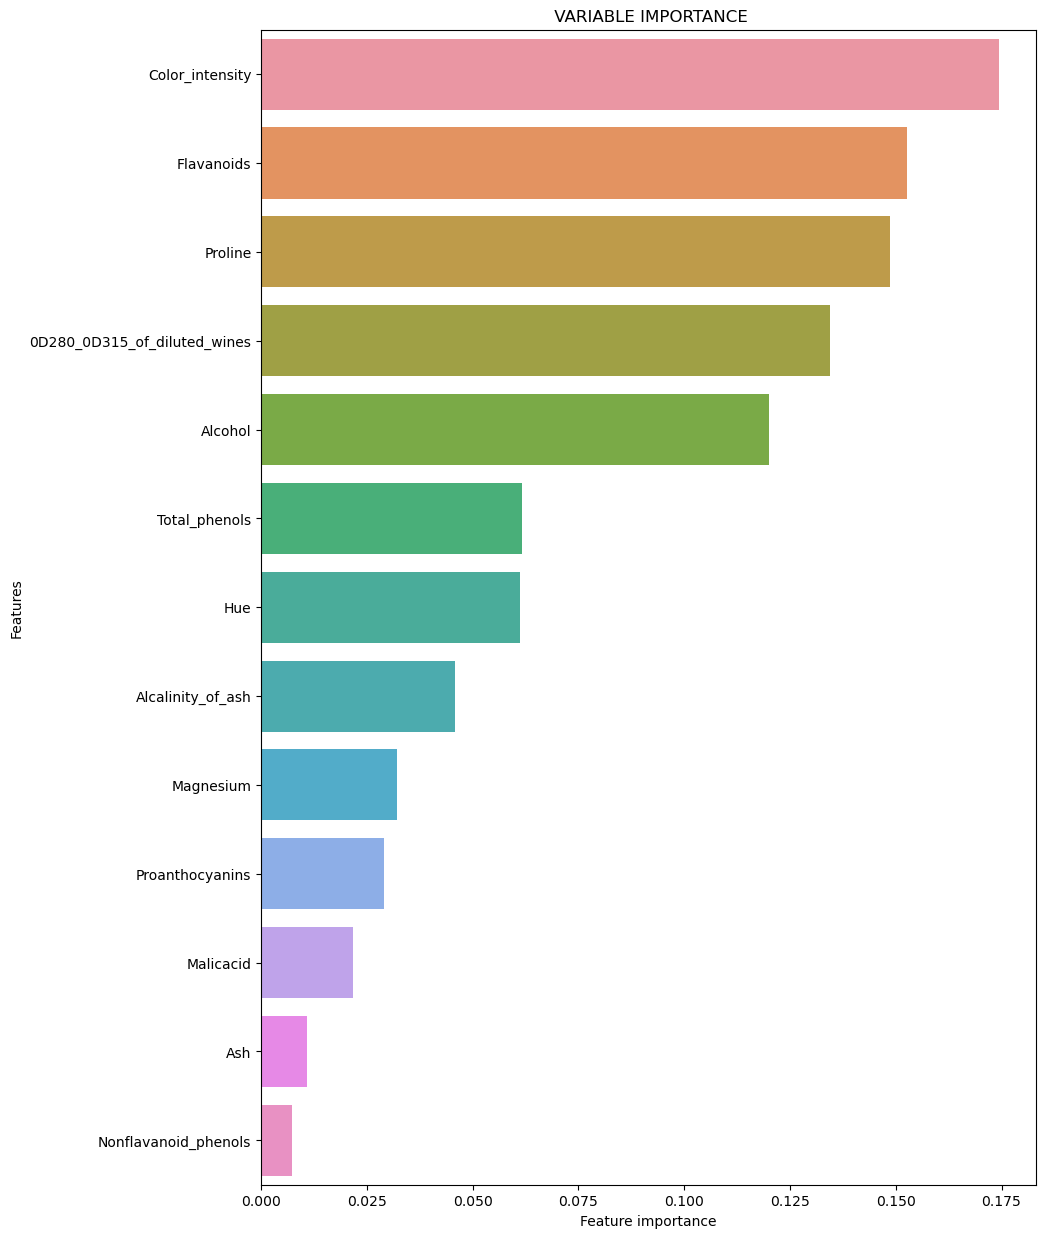

In [18]:
importances = forest_clf.feature_importances_

feature_imp = np.array(importances)
feature_names= np.array(names)
data={'feature_names':feature_names,'feature_importance':feature_imp}
table = pd.DataFrame(data) 
table.sort_values(by=['feature_importance'], ascending=False, inplace=True) 
plt.figure(figsize=(10,15))
sns.barplot(x=table['feature_importance'], y=table['feature_names'])
plt.title(' VARIABLE IMPORTANCE')
plt.xlabel('Feature importance')
plt.ylabel('Features')
plt.show()